In [1]:
import requests
import re
import pandas as pd
import numpy as np

In [66]:
# webscraping: getting table of soccer players from wiki
headers = {'User-Agent': 'For Stat386 homework'}
url = "https://en.wikipedia.org/wiki/List_of_men%27s_footballers_with_100_or_more_international_caps"
r = requests.get(url, headers=headers)
tables = pd.read_html(r.text)
df = tables[1]
df.to_csv('football.csv', index = False)
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8220\2967466159.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(r.text)


,Rank,Players,Nation,Confederation,Caps,Debut,Latest
0,1,Cristiano Ronaldo,Portugal,UEFA,226.0,20 August 2003,13 November 2025
1,2,Bader Al-Mutawa,Kuwait,AFC,202.0,4 September 2003,14 June 2022
2,3,Lionel Messi,Argentina,CONMEBOL,196.0,17 August 2005,14 November 2025
3,4,Soh Chin Ann[a],Malaysia,AFC,195.0,19 November 1969,18 October 1984
4,5,Luka Modrić,Croatia,UEFA,193.0,1 March 2006,14 November 2025


In [67]:
# cleaning up the data
df['Players'] = df['Players'].str.replace(r'\[([a-z]+)\]', '', regex=True)
df = df[df['Confederation'] != 'OFC / AFC[1]']
df = df.dropna()

# new columns
df['Debut'] = pd.to_datetime(df['Debut'], errors='coerce')
df['Latest'] = pd.to_datetime(df['Latest'], errors='coerce')
df["Years Active"] = round(((df['Latest'] - df['Debut']).dt.days / 365), 2)
df['Caps Per Year'] = round((df['Caps'] / df['Years Active']), 2)
df = df.sort_values(by=['Caps Per Year', 'Caps'], ascending=False).reset_index(drop=True)
df = df[['Players','Nation', 'Confederation', 'Caps', 'Years Active', 'Caps Per Year']]

df.head()

,Players,Nation,Confederation,Caps,Years Active,Caps Per Year
0,Mohammed Al-Khilaiwi,Saudi Arabia,AFC,163.0,8.96,18.19
1,Kim Ho-kon,South Korea,AFC,117.0,7.31,16.01
2,Abdullah Zubromawi,Saudi Arabia,AFC,141.0,9.15,15.41
3,Shukor Salleh,Malaysia,AFC,163.0,10.83,15.05
4,Cobi Jones,United States,CONCACAF,164.0,12.11,13.54


In [15]:
import seaborn as sns

<Axes: xlabel='Years Active', ylabel='Caps'>

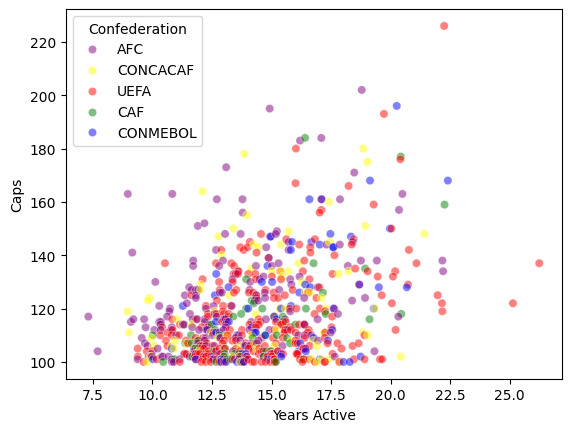

In [35]:
# analyzing and visualizing the data
color = {'UEFA' : 'red', 'AFC' : 'purple', 'CONCACAF' : 'yellow', 'CONMEBOL' : 'blue', 'CAF' : 'green'}
sns.scatterplot(x = 'Years Active', y = 'Caps', data = df, hue = 'Confederation', palette = color, alpha = 0.5)

In [58]:
df.groupby('Confederation')["Caps"].mean()

Confederation
AFC         121.810811
CAF         114.090909
CONCACAF    122.857143
CONMEBOL    121.408451
UEFA        116.691729
Name: Caps, dtype: float64

In [71]:
print(np.corrcoef(df['Years Active'], df['Caps'])[0,1])

0.3615047149142935
